### 基本概念

- 根节点：树的最顶端，最开始的节点
- 内部节点： 树中间的节点
- 叶节点：树最底部的节点，也就是决策结果
 
> **构造和剪枝**
>> - 构造的过程就是选择什么属性作为节点的过程
- 剪枝就是给决策树瘦身，这一步的目标就是不需要太多的判断，同样可以得到不错的结果，防止“过拟合”的现象发生
 
> **泛化能力**
>>指的是通过训练集抽象出来的分类能力，也就是举一反三的能力
 
> **预剪枝和后剪枝**
>> - 如果对某个节点进行划分，在验证集中不能带来准确的提升，那么对这个节点进行划分就没有意义，这时就会把当前节点作为叶节点，不对其进行划分
- 决策树生成之后在进行剪枝，从叶节点开始，逐层向上对每个节点进行评估。如果减掉这个节点子树，与保留该节点子树在分类准确性上差别不大或者准确性的提升，就可以进行剪枝

[推荐博客:白话机器学习算法之决策树](https://blog.csdn.net/wuzhongqiang/article/details/104154654)

### 如何选择节点

- 将哪个属性作为根节点是个关键问题，这里有个指标
> **纯度和信息熵**
>> - 纯度：可以把决策树的构造过程理解成为寻找纯净划分的过程，换一种方式解释就是让目标变量的分歧最小
- 信息熵: 表示信息的不确定度
-----------------------------------------------
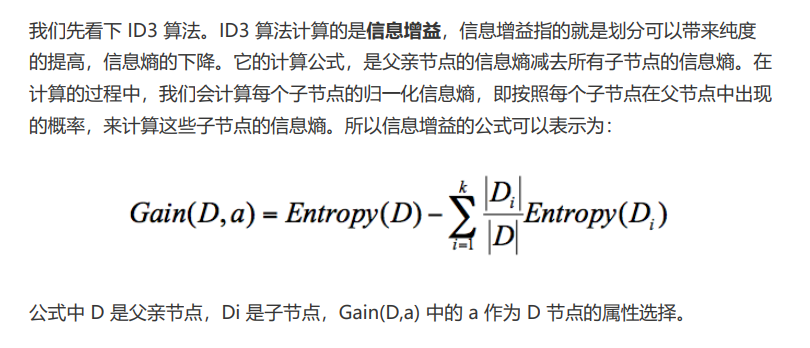

-----------------------------------------------------------------
- 我们在构造决策树的时候，会基于纯度来构建。而经典的“不纯度”的指标有三种，分别是信息增益（ID3算法），信息增益率（C4.5算法）以及基尼指数（Cart算法）
---------------------------------------------
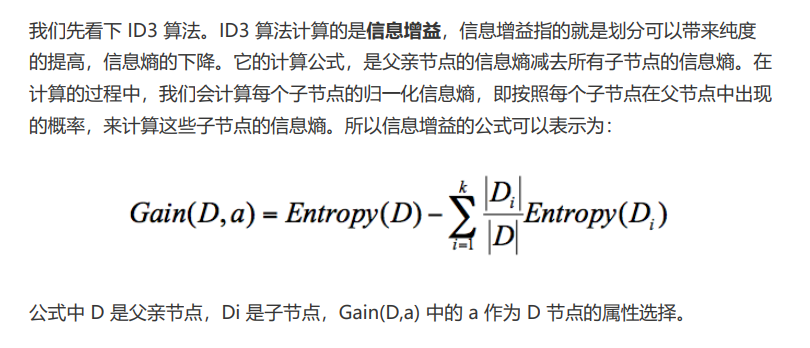
----------------------------------------------------------

- ID3的缺陷：有些属性可能对分类任务没有太大的作用（比如：编号），但是他们仍然可能会被选做最优解，所以才有了改进的C4.5算法

> - C4.5 
>>- 信息增益率 = 信息增益/属性熵
>>- 采用悲观剪枝：后剪枝技术，通过递归估算每个内部节点的分类错误率，比较剪枝前后这个节点的分类错误率来决定是否对齐进行剪枝 
>>- 离散化处理连续属性：C4.5选择具有最高信息增益的划分所对应的阈值
>>- 处理缺失值：针对数据集不完整的情况：C4.5也可以进行处理

### CART 决策树

- 分类回归树，ID3和C4.5算法可以生成二叉树和多叉树，但是CART只支持二叉树，同时CART决策树比较特殊，既可以作分类树又可以作回归树
- 分类树可以处理离散数据，也就是数据种类有限的数据，它输出的是样本的类别；而回归树可以对连续性的数值进行预测，也就是数据在某个区间内都有可能取值的可能，它输出的是一个数值

> -基尼指数
- 实际上CART分类树与C4.5算法类似，只是属性选择的指标采用的是基尼系数
>>- 基尼系数：用来衡量一个国家收入差距的常用指标，>0.4说明财富差异悬殊，0.2-0.4之间说明分配合理
>>- 基尼系数越小的时候，说明样本之间的差异性小，不确定程度低。分类的过程本身就是一个不确定度降低的过程，即纯度的提升过程。所以会选择基尼系数最小的属性作为属性的划分
----------------------------------
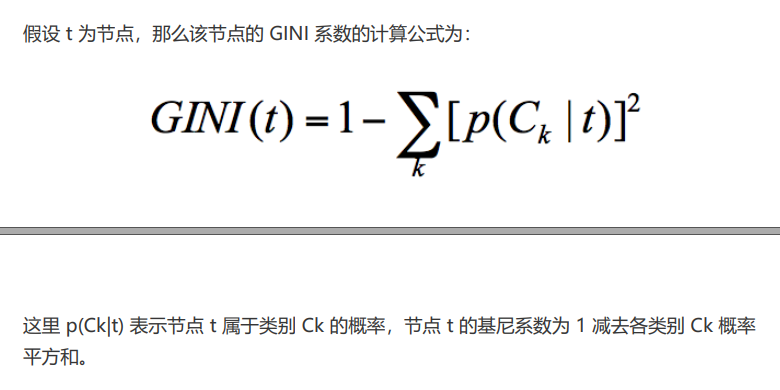
------------------------------------
- python包的封装
sklearn中，我们想要创建CART分类树，可以直接使用DecisionTreeClassifier这个类，默认情况下criterion这个参数等于gini，也就是按照基尼系数来选择属性划分也就是默认采用CART分类树。

### CART回归树

- 回归树的数据集的过程和分类树的过程一样，只是回归树得到的预测结果是连续值，而且评判“不纯度”的指标不同。分类树中采用的是基尼系数作为标准，在回归树中：我们要根据样本的混乱程度也就是样本的离散程度来评价“不纯度”
> - 样本的离散程度具体的计算方式是，先计算所有样本的均值，然后计算每个样本到均值的差值
>> - 取差值的绝对值，即最小绝对偏差（LAD）
>> - 取差值的方差，即最小二乘偏差（LSD）

### CART的剪枝

- 主要的剪枝方式是CCP方法，后剪枝，中文叫做：代价复杂度
> 这种剪枝方式用到一个指标叫做节点的表面误差率增益值，以此作为剪枝前后误差的定义，所以节点的表面误差率增益值等于节点t的子树被剪枝后的误差变化除以减掉的叶子数量

### CART算法创建分类树

In [5]:
# encoding=utf-8
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# 准备数据集
iris = load_iris()
# 获取特征集和分类标识
features = iris.data
labels = iris.target

# 随机抽取33%的数据作为测试集，其余为训练集
train_feature,test_features,train_labels,test_labels =train_test_split(features,
                                                                       labels,
                                                                      test_size = 0.33,
                                                                       random_state =0
                                                                      )
# 创建CART分类树
clf = DecisionTreeClassifier(criterion='gini')
# 拟合构造CART分类树
clf = clf.fit(train_feature,train_labels)
# 利用分类树做预测
test_predict = clf.predict(test_features)
                          
# 预测结果个测试结果做对比
score = accuracy_score(test_labels,test_predict)
print("CART分类准确率%.4lf"%score)

CART分类准确率0.9800


### CART算法创建回归树

In [10]:
# encoding=utf-8
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# 准备数据集
boston = load_boston()

# 探索数据
print(boston.feature_names)
# 获取特征集和房价
features = boston.data
prices = boston.target

# 随机抽取33%的数据作为测试集，其余为训练集
train_feature,test_feature,train_price,test_price = train_test_split(features,
                                                                    prices,
                                                                    test_size = 0.33)

# 创建CART回归树
dtr = DecisionTreeRegressor()

# 拟合CART回归树
dtr.fit(train_feature,train_price)

# 预测房价
predict_price = dtr.predict(test_feature)

# 测试集的结果评价
print("回归树二乘偏差均值LSD:",mean_squared_error(test_price,predict_price))
print("回归树绝对值偏差均值LAD:",mean_absolute_error(test_price,predict_price))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
回归树二乘偏差均值LSD: 18.36520958083832
回归树绝对值偏差均值LAD: 2.9359281437125744


### 决策树的项目

> 金融行业的可以用决策树做贷款风险评估，医疗行业可以用决策树生成辅助诊断，电商行业可以进行销售额的预测
[泰坦尼克存活率分类的项目](https://github.com/cystanford/Titanic_Data)